# Dictionary lookup and word error rates 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
db_sentence = pd.read_pickle("./db_trove_sentence_with_lookup.pkl")
db_sentence.head()

,filePath,articleId,articleType,year,ocrText,humanText,corrected,str_similarity,str_length_humanText,str_length_ocrText,quality_band,use_corrected,corrected_sentencizer,corrected_dict_lookup,ocr_sentencizer,ocr_dict_lookup
1,./trove_overproof/datasets/dataset1/rawTextAnd...,18378453,Article ILLUSTRATED,1953,"FROM RIVER CROSSING TO END OF TRIÄÜ I ^PI A^H""...",FROM RIVER CROSSING TO END OF TRIAL SPLASH: Pe...,FROM RIVER CROSSING TO END OF TRIAL SPLASH: Pe...,0.847561,746,820,2,0,"[[FROM, RIVER, CROSSING, TO, END, OF, TRIAL, S...","[[4, 5, 8, 2, 3, 2, 5, 6, 1, -5, -6, 8, 4, 4, ...","[[FROM, RIVER, CROSSING, TO, END, OF, TRIÄÜ, I...","[[4, 5, 8, 2, 3, 2, -5, 1, 1, 2, -3, 1, -5, -6..."
2,./trove_overproof/datasets/dataset1/rawTextAnd...,18363627,Article,1953,"Natural Childbirth Sir,-We nurses have seen fa...","Natural Childbirth Sir,-We nurses have seen fa...","Natural Childbirth Sir,-We nurses have seen fa...",0.964119,641,630,1,0,"[[Natural, Childbirth, Sir,-We, nurses, have, ...","[[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, ...","[[Natural, Childbirth, Sir,-We, nurses, have, ...","[[7, 10, -7, 6, 4, 4, 3, 3, 4, 5, 6, 4, 6, 5, ..."
3,./trove_overproof/datasets/dataset1/rawTextAnd...,18366055,Article,1953,FIRST CHURCH I SERVICE 1 Presbyterian I ' Anni...,FIRST CHURCH SERVICE Presbyterian Anniversary ...,FIRST CHURCH SERVICE Presbyterian Anniversary ...,0.738901,946,832,3,0,"[[FIRST, CHURCH, SERVICE, Presbyterian, Annive...","[[5, 6, 7, 12, 11, 3, 5, 11, 2, 3, 5, 12, 6, 7...","[[FIRST, CHURCH, I, SERVICE, 1, Presbyterian, ...","[[5, 6, 1, 7, 1, 12, 1, 1, 11, 1, 3, 5, -12, 3..."
4,./trove_overproof/datasets/dataset1/rawTextAnd...,18386137,Article,1953,"""Bob"" Lulham's Fight Against Thallium District...","""Bob"" Lulham's Fight Against Thallium Arthur ...","""Bob"" Lulham's Fight Against Thallium Arthur ...",0.493898,2950,2740,4,0,"[["", Bob, "", Lulham, 's, Fight, Against, Thall...","[[1, 3, 1, -6, 2, 5, 7, 8, 6, 6, 1, 1, 3, 1, 1...","[["", Bob, "", Lulham, 's, Fight, Against, Thall...","[[1, 3, 1, -6, 2, 5, 7, 8, 8, 8, 1], [4, 5, 6,..."
5,./trove_overproof/datasets/dataset1/rawTextAnd...,18368961,Article,1953,"DIVORCE Before The Judge In Divorce, Mr Justic...","DIVORCE Before The Judge In Divorce, Mr. Justi...","DIVORCE Before The Judge In Divorce, Mr. Justi...",0.894176,1219,1121,2,0,"[[DIVORCE, Before, The, Judge, In, Divorce, ,,...","[[7, 6, 3, 5, 2, 7, 1, 2, 1, 7, -5, 7, 4, 1, 1...","[[DIVORCE, Before, The, Judge, In, Divorce, ,,...","[[7, 6, 3, 5, 2, 7, 1, 2, 7, -5, 7, 4, 1, 1, -..."


## Functions

In [4]:
def human_ocr_percentage(myrow, colname="ocr_dict_lookup_list", min_num_letters=4):
    myrow_array = np.array(myrow[colname]).astype(np.int)
    ocr_perc = len(myrow_array[myrow_array >= min_num_letters]) / max(1, len(myrow_array[abs(myrow_array) >= min_num_letters]))
    return ocr_perc*100

In [5]:
def jaccard_similarity_df(myrow, colname_1, colname_2):
    """
    Jaccard similarity between two documents (e.g., OCR and Human) on flattened list of words
    """
    intersection = len(list(set(myrow[colname_1]).intersection(myrow[colname_2])))
    union = (len(myrow[colname_1]) + len(myrow[colname_2])) - intersection
    return float(intersection) / union

In [6]:
def jaccard_similarity_df_each_sentence(myrow, colname_1, colname_2):
    """
    Jaccard similarity between two documents (e.g., OCR and Human) by averaging over all sentences
    """
    jaccard_mean = 0
    counter = 0
    for i in range(len(myrow[colname_1])):
        try:
            intersection = len(list(set(myrow[colname_1][i]).intersection(myrow[colname_2][i])))
            union = (len(myrow[colname_1][i]) + len(myrow[colname_2][i])) - intersection
            jaccard_mean += float(intersection) / union
            counter += 1
        except IndexError:
            jaccard_mean += 0
            counter += 1
    return jaccard_mean / max(1, counter)

In [13]:
"""
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union
"""

'\ndef jaccard_similarity(list1, list2):\n    intersection = len(list(set(list1).intersection(list2)))\n    union = (len(list1) + len(list2)) - intersection\n    return float(intersection) / union\n'

## OCR Dataset

In [7]:
db_sentence['ocr_dict_lookup_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['ocr_dict_lookup'] for item in sublist], axis=1)

In [8]:
min_num_letters = 4
db_sentence['ocr_dict_perc'] = \
    db_sentence.apply(human_ocr_percentage, args=["ocr_dict_lookup_list", min_num_letters], axis=1)

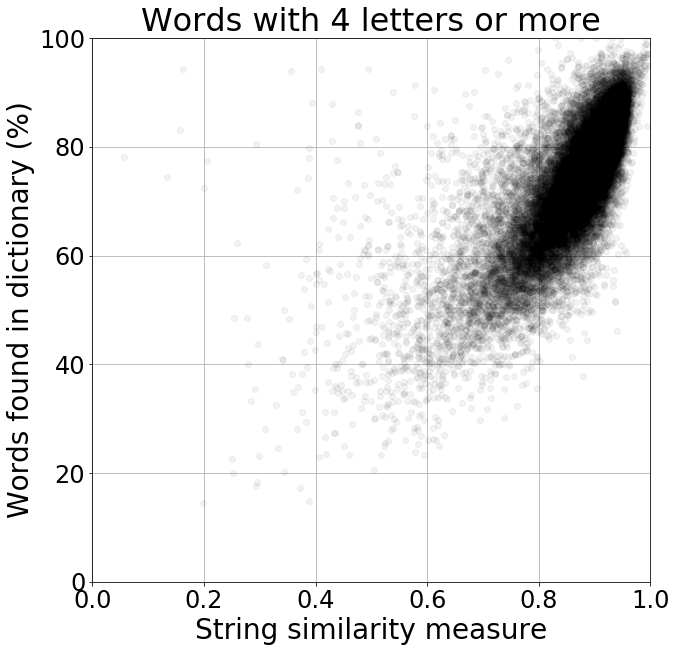

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(db_sentence['str_similarity'], db_sentence['ocr_dict_perc'], 'ko', alpha=0.05)
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("String similarity measure", size=28)
plt.ylabel("Words found in dictionary (%)", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 100)
plt.title("Words with {} letters or more".format(min_num_letters), size=32)
plt.show()

## Corrected Dataset

In [10]:
db_sentence['corrected_dict_lookup_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['corrected_dict_lookup'] for item in sublist], axis=1)

In [11]:
min_num_letters = 4
db_sentence['corr_dict_perc'] = \
    db_sentence.apply(human_ocr_percentage, args=["corrected_dict_lookup_list", min_num_letters], axis=1)

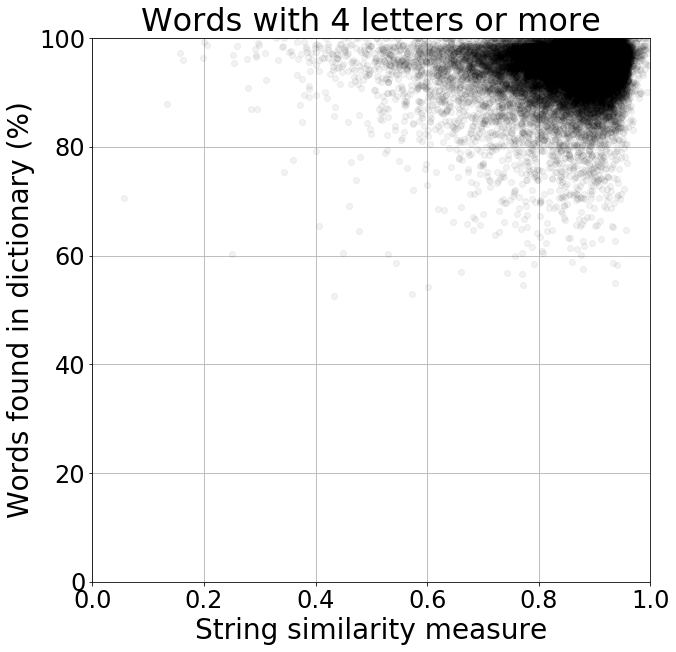

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(db_sentence['str_similarity'], db_sentence['corr_dict_perc'], 'ko', alpha=0.05)
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("String similarity measure", size=28)
plt.ylabel("Words found in dictionary (%)", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 100)
plt.title("Words with {} letters or more".format(min_num_letters), size=32)
plt.show()

## Jaccard similarity, on flattened list of words

In [14]:
db_sentence['corrected_sentencizer_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['corrected_sentencizer'] for item in sublist], axis=1)

In [15]:
db_sentence['ocr_sentencizer_list'] = \
    db_sentence.apply(lambda x: [item for sublist in x['ocr_sentencizer'] for item in sublist], axis=1)

In [16]:
db_sentence['jaccard_similarity'] = \
    db_sentence.apply(jaccard_similarity_df, args=['ocr_sentencizer_list', "corrected_sentencizer_list"], axis=1)

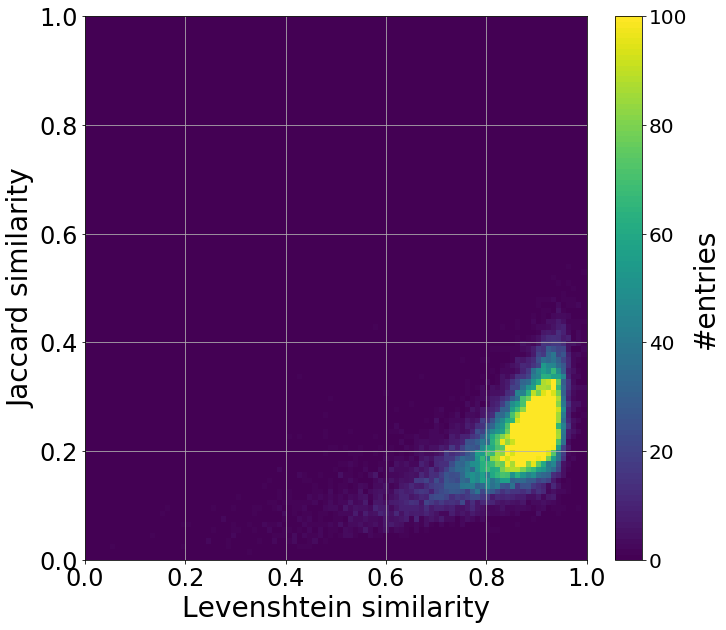

In [19]:
plt.figure(figsize=(10, 10))

xbins = np.linspace(0, 1, 100)
ybins = np.linspace(0, 1, 100)

plt.hist2d(db_sentence['str_similarity'], db_sentence['jaccard_similarity'], 
           bins=[xbins, ybins],
           vmax=100,
           cmap=plt.cm.get_cmap('viridis', 100)
          )
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

cbar = plt.colorbar(aspect=20, orientation="vertical", fraction=0.05)
cbar.set_label('#entries',size=28)
cbar.ax.tick_params(labelsize=20) 
plt.show()


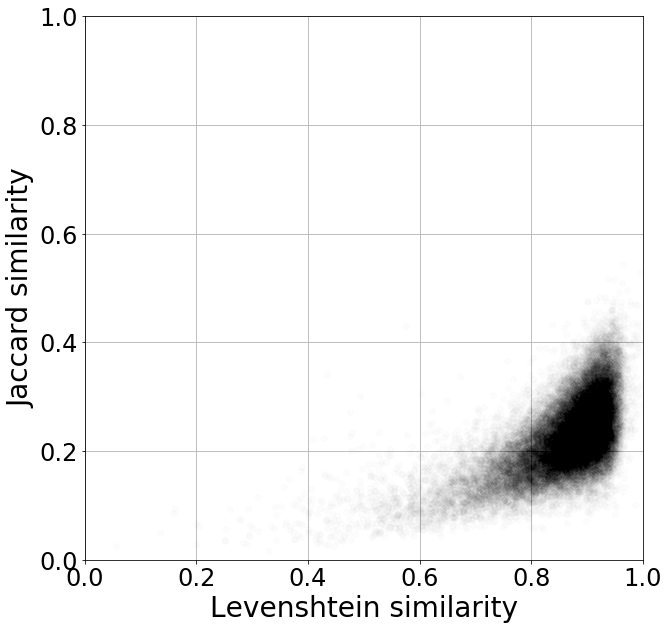

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(db_sentence['str_similarity'], db_sentence['jaccard_similarity'], 'ko', alpha=0.01)
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 1.0)
plt.show()

## Jaccard similarity, averaging over all sentences

In [21]:
from pandarallel import pandarallel
# Initialization
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data tranfer (pipe) to transfer data between the main process and workers.


In [22]:
db_sentence['jaccard_similarity_mean_sentence'] = \
    db_sentence.parallel_apply(jaccard_similarity_df_each_sentence, args=['ocr_sentencizer', "corrected_sentencizer"], axis=1)

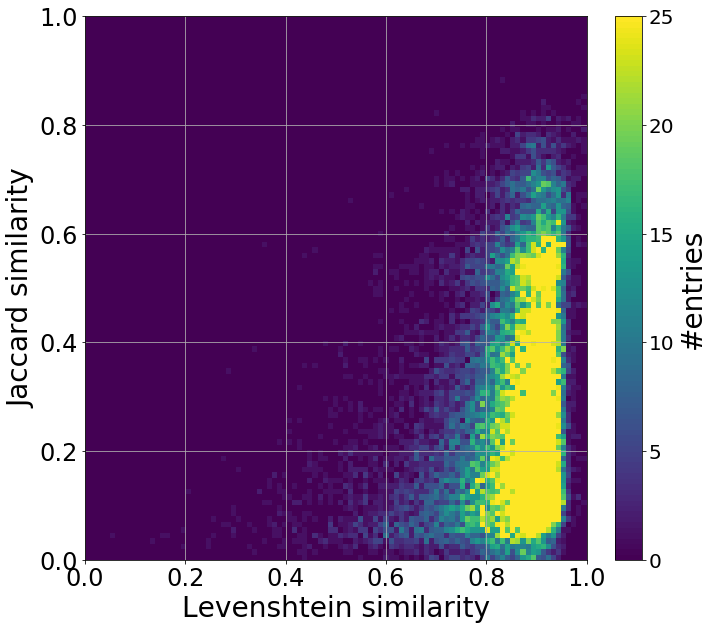

In [30]:
plt.figure(figsize=(10, 10))

xbins = np.linspace(0, 1, 100)
ybins = np.linspace(0, 1, 100)

plt.hist2d(db_sentence['str_similarity'], db_sentence['jaccard_similarity_mean_sentence'], 
           bins=[xbins, ybins],
           vmax=25,
           cmap=plt.cm.get_cmap('viridis', 100)
          )
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

cbar = plt.colorbar(aspect=20, orientation="vertical", fraction=0.05)
cbar.set_label('#entries',size=28)
cbar.ax.tick_params(labelsize=20) 
plt.show()

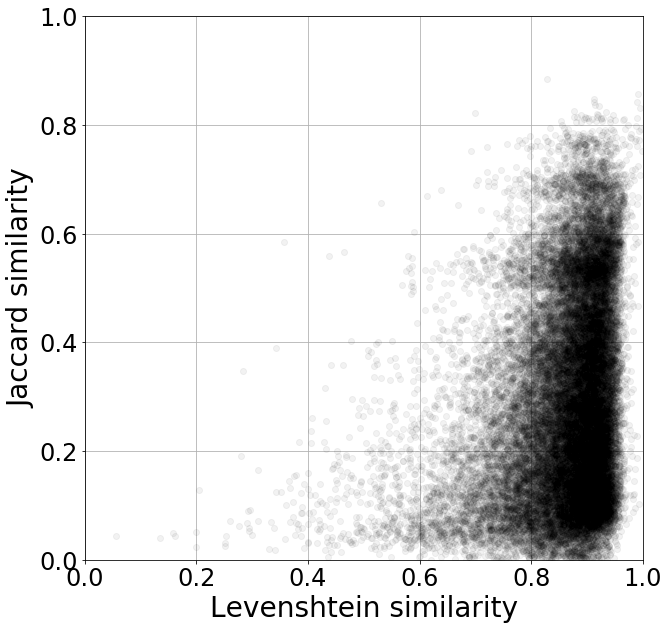

In [27]:
plt.figure(figsize=(10, 10))
plt.plot(db_sentence['str_similarity'], db_sentence['jaccard_similarity_mean_sentence'], 'ko', alpha=0.05)
plt.grid()
plt.xticks(size=24)
plt.yticks(size=24)
plt.xlabel("Levenshtein similarity", size=28)
plt.ylabel("Jaccard similarity", size=28)
plt.xlim(0.0, 1.0)
plt.ylim(0, 1.0)
plt.show()